# Airbnb

Import important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# !pip install yellowbrick
from yellowbrick.target import BalancedBinningReference
from yellowbrick.regressor import PredictionError, ResidualsPlot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
# importing dataset
df=pd.read_csv('Airbnb_dataset.csv')
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,City,City_type
0,2818.0,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,49,3,305,2022-08-30,1.86,1,14,25,Toronto,Mega
1,20168.0,Studio with private bathroom in the centre 1,59484,Alexander,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.22,2,0,0,Toronto,Mega
2,27886.0,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.38761,4.89188,Private room,136,2,231,2022-04-24,1.78,1,121,8,Toronto,Mega
3,28871.0,Comfortable double room,124245,Edwin,Centrum-West,52.36775,4.89092,Private room,75,2,428,2022-08-24,2.92,2,117,75,Toronto,Mega
4,29051.0,Comfortable single room,124245,Edwin,Centrum-Oost,52.36584,4.89111,Private room,55,2,582,2022-08-29,4.16,2,160,86,Toronto,Mega


In [3]:
# statical information of data

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.469400e+04,3.469400e+04,34694.000000,34694.000000,34694.000000,34694.000000,34694.000000,34694.000000,34694.000000,34694.000000,34694.000000
mean,1.961868e+17,1.481033e+08,48.131659,-72.932218,198.759440,12.007264,37.625901,1.313148,7.669280,140.683173,11.744711
std,3.092698e+17,1.522462e+08,2.606975,44.130251,1517.648839,72.959732,73.301660,1.909346,20.801111,134.209238,22.226855
min,1.591000e+03,1.748000e+03,45.404394,-124.422490,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.234830e+07,2.063191e+07,45.522870,-123.081513,81.000000,1.000000,2.000000,0.090000,1.000000,1.000000,0.000000
50%,4.205145e+07,8.223797e+07,48.421870,-73.582120,125.000000,2.000000,10.000000,0.560000,1.000000,93.000000,3.000000
75%,6.000000e+17,2.452671e+08,49.287205,-71.237130,199.000000,7.000000,40.000000,1.910000,4.000000,270.000000,14.000000
max,7.910000e+17,4.928783e+08,52.442340,5.074204,119149.000000,11684.000000,1520.000000,104.110000,210.000000,365.000000,1250.000000


In [4]:
# Check null values

df.isnull().sum().to_frame()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0


### Performing EDA

Text(0.5, 1.0, 'Top 5 Hosts With Most Posts')

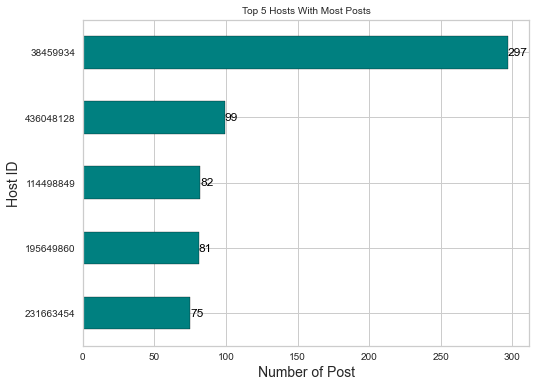

In [5]:
# Using "host_id" column, we can easily analyze the hosts who share the most posts.

plt.figure(figsize = (8,6))
ax = plt.axes()
df["host_id"].value_counts().head().sort_values().plot(kind = "barh", 
                                                       color = "teal", 
                                                       hatch=")", 
                                                       edgecolor="black")
ax.bar_label(ax.containers[0], fmt='%.0f', color="black", fontsize=12)
plt.xlabel("Number of Post", size = 14)
plt.ylabel("Host ID", size = 14)
plt.title("Top 5 Hosts With Most Posts", size = 10)

Text(0.5, 1.0, 'Neighborhoods with the Most Posts by "host 219517861"')

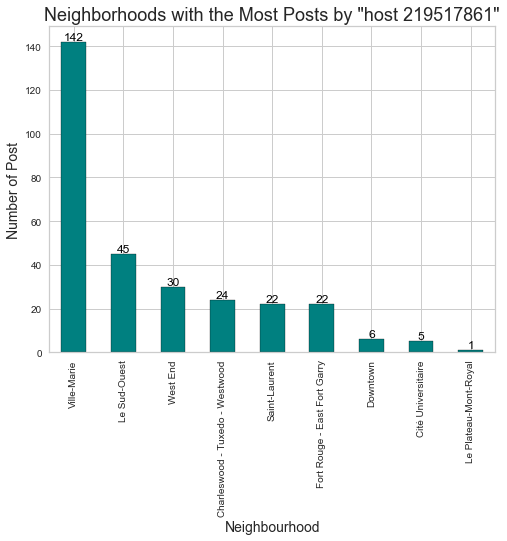

In [6]:
plt.figure(figsize = (8,6))
ax = plt.axes()
df.loc[df['host_id'] == 38459934]["neighbourhood"].value_counts().plot(kind = "bar", 
                                                                        color = "teal",
                                                                        hatch=")",
                                                                        edgecolor="black")
ax.bar_label(ax.containers[0], fmt='%.0f', color="black", fontsize=12)
plt.xlabel("Neighbourhood", size = 14)
plt.ylabel("Number of Post", size = 14)
plt.title('Neighborhoods with the Most Posts by "host 219517861"', size = 18)

Text(0.5, 1.0, 'Top 5 Neighbourhood')

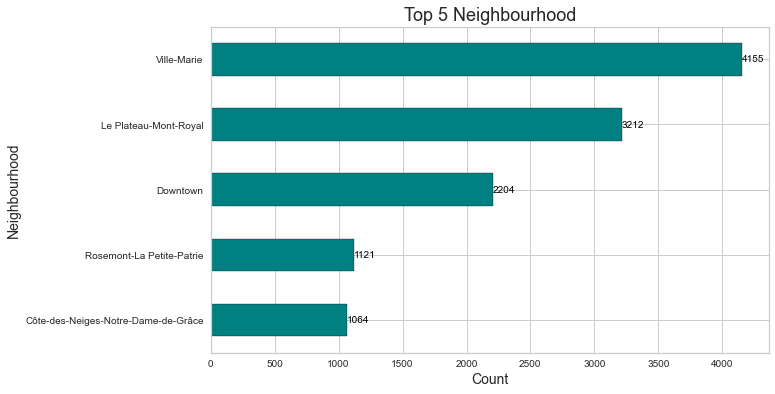

In [7]:
plt.figure(figsize = (10,6))
ax = plt.axes()
df["neighbourhood"].value_counts().head(5).sort_values().plot(kind = "barh", 
                                                               color = "teal",
                                                               edgecolor="black")
ax.bar_label(ax.containers[0], fmt='%.0f', color="black", fontsize=10)
plt.xlabel("Count", size = 14)
plt.ylabel("Neighbourhood", size = 14)
plt.title("Top 5 Neighbourhood", size = 18)

Text(0.5, 1.0, 'Top 20 Neighbourhood with Highest Avg. Prices')

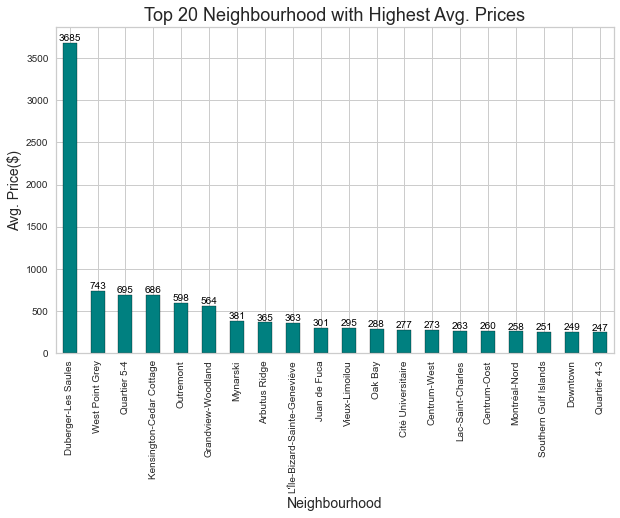

In [8]:
plt.figure(figsize = (10,6))
ax = plt.axes()
top_20_n_p_mean_df = df.groupby("neighbourhood")["price"].agg("mean").sort_values(ascending=False).head(20)
top_20_n_p_mean_df.sort_values(ascending=False).plot(kind = "bar", 
                                                     color = "teal", 
                                                     edgecolor="black")
ax.bar_label(ax.containers[0], fmt='%.0f', color="black", fontsize=10)
plt.xlabel("Neighbourhood", size = 14)
plt.ylabel("Avg. Price($)", size = 14)
plt.title("Top 20 Neighbourhood with Highest Avg. Prices", size = 18)

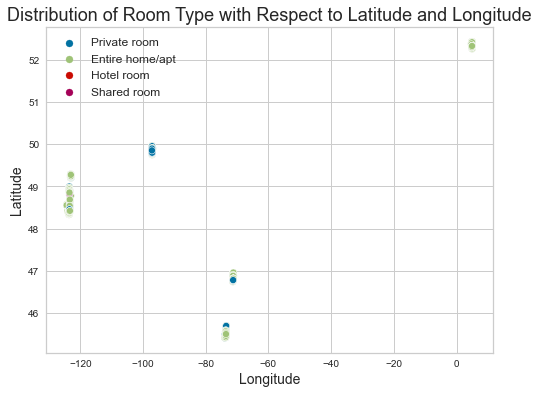

In [9]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, x="longitude", y="latitude", hue="room_type")
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title("Distribution of Room Type with Respect to Latitude and Longitude", fontsize=18)
plt.legend(prop={"size":12})

Text(0.5, 1.0, 'City type Posts')

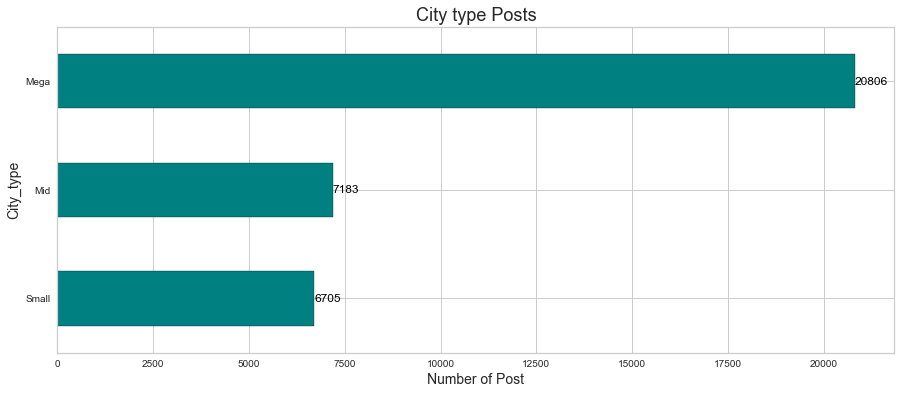

In [10]:
# Using "City_type" column, we can easily analyze the City_type with the most posts.
plt.figure(figsize = (15,6))
ax = plt.axes()
df["City_type"].value_counts().sort_values().plot(kind = "barh", 
                                                       color = "teal", 
                                                       hatch=")", 
                                                       edgecolor="black")
ax.bar_label(ax.containers[0], fmt='%.0f', color="black", fontsize=12)
plt.xlabel("Number of Post", size = 14)
plt.ylabel("City_type", size = 14)
plt.title("City type Posts", size = 18)

Text(0.5, 1.0, 'Different cities with number of posts')

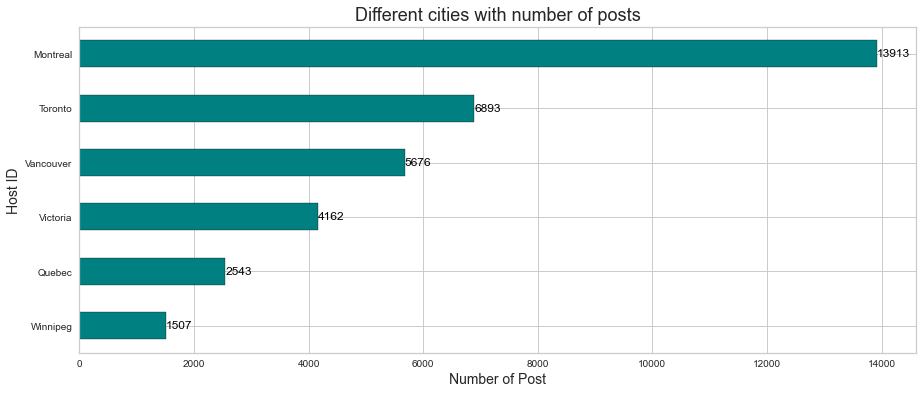

In [11]:
# Using "city" column, we can easily analyze the cities with number of posts.

plt.figure(figsize = (15,6))
ax = plt.axes()
df["City"].value_counts().sort_values().plot(kind = "barh", 
                                                       color = "teal", 
                                                       hatch=")", 
                                                       edgecolor="black")
ax.bar_label(ax.containers[0], fmt='%.0f', color="black", fontsize=12)
plt.xlabel("Number of Post", size = 14)
plt.ylabel("Host ID", size = 14)
plt.title("Different cities with number of posts", size = 18)

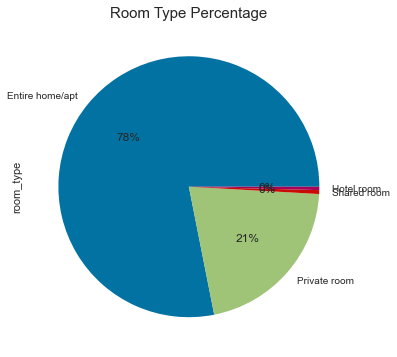

In [12]:
df['room_type'].value_counts().plot(kind='pie', autopct='%1.0f%%', subplots=True, figsize=(10,6))

plt.title("Room Type Percentage", size=15)

plt.show()

Text(0.5, 1.0, 'Room Types')

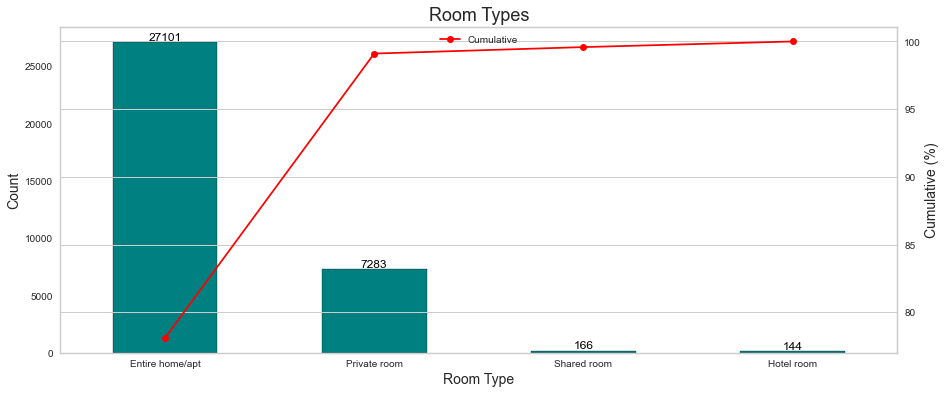

In [13]:
cumulative = df["room_type"].value_counts(normalize=True).cumsum()*100
plt.figure(figsize = (15,6))
ax1 = df["room_type"].value_counts().sort_values(ascending=False).plot(kind = "bar", 
                                                                       color = "teal",
                                                                       hatch=")", 
                                                                       edgecolor="black")

ax1.bar_label(ax1.containers[0], fmt='%.0f', color="black", fontsize=12)
ax2 = cumulative.plot(kind="line", color="red", secondary_y=True, marker="o")
ax1.set_xlabel("Room Type", size = 14)
ax1.set_ylabel("Count", size = 14)
ax2.set_ylabel("Cumulative (%)", size = 14)
ax2.legend(["Cumulative"],loc=9)
plt.title("Room Types", size = 18)

Text(0.5, 1.0, 'Room Types With Avg. Prices')

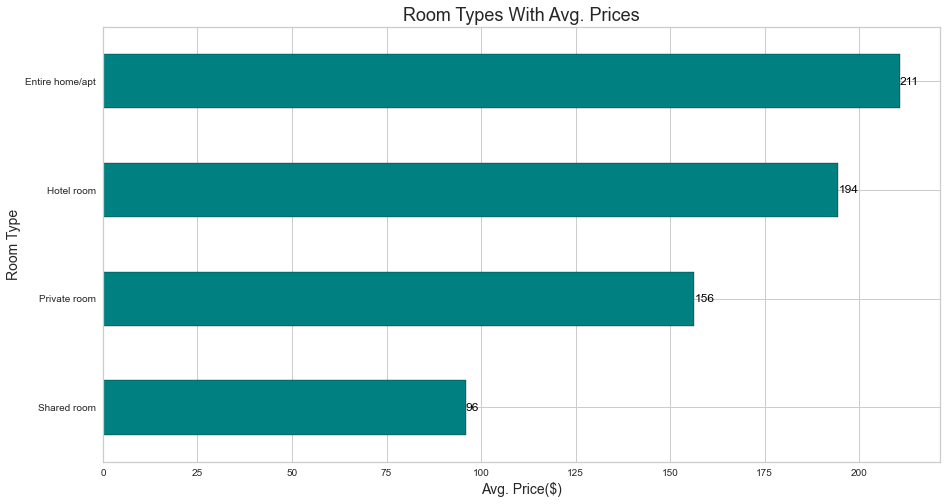

In [14]:
plt.figure(figsize = (15,8))
ax = plt.axes()
r_p_mean_df = df.groupby("room_type")["price"].agg("mean")
r_p_mean_df.sort_values(ascending=True).plot(kind = "barh", 
                                             color = "teal",
                                             hatch=")", 
                                             edgecolor="black")
ax.bar_label(ax.containers[0], fmt='%.0f', color="black", fontsize=12)
plt.xlabel("Avg. Price($)", size = 14)
plt.ylabel("Room Type", size = 14)
plt.title("Room Types With Avg. Prices", size = 18)

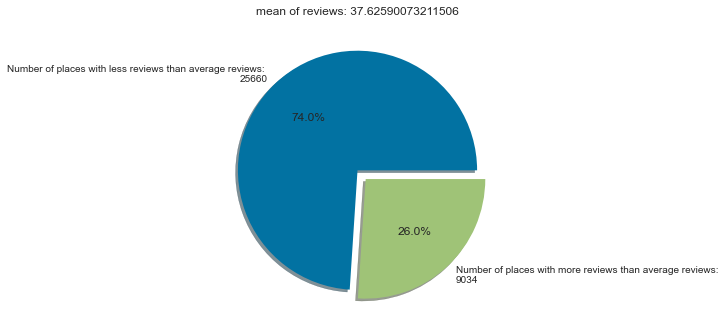

In [15]:
y = [len(df[df['number_of_reviews']<np.mean(df['number_of_reviews'].values)]['number_of_reviews']),len(df[df['number_of_reviews']>np.mean(df['number_of_reviews'].values)]['number_of_reviews'])]
x = [f"Number of places with less reviews than average reviews: \n{len(df[df['number_of_reviews']<np.mean(df['number_of_reviews'].values)]['number_of_reviews'])}",
     f"Number of places with more reviews than average reviews: \n{len(df[df['number_of_reviews']>np.mean(df['number_of_reviews'].values)]['number_of_reviews'])}"]
y_per = [y[0]/len(df), y[1]/len(df)]
explode = [0,0.1]
plt.title(f"mean of reviews: {np.mean(df['number_of_reviews'].values)}")
plt.pie(y_per,labels = x,autopct='%.1f%%',explode = explode,shadow=True);

(80.0, 300.0)

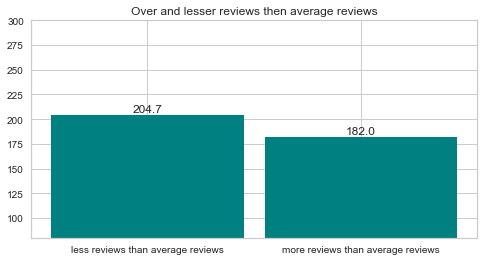

In [16]:
# which has more reviews than the average reviews, has significantly less reviews than the average reviews.
nor_list = [np.mean(df[df['number_of_reviews']<np.mean(df['number_of_reviews'].values)]['price']),
      np.mean(df[df['number_of_reviews']>np.mean(df['number_of_reviews'].values)]['price'])]
plt.figure(figsize=(8,4))
x = ["less reviews than average reviews","more reviews than average reviews"]
y = nor_list
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 0.5, '%.1f' %height, ha='center', va='bottom', size = 12)
plt.bar(x,y,width=0.9,color = "teal")
plt.title("Over and lesser reviews then average reviews")
plt.ylim(80,300)

Text(0.5, 1.0, 'Price Distribution After Log Transformation')

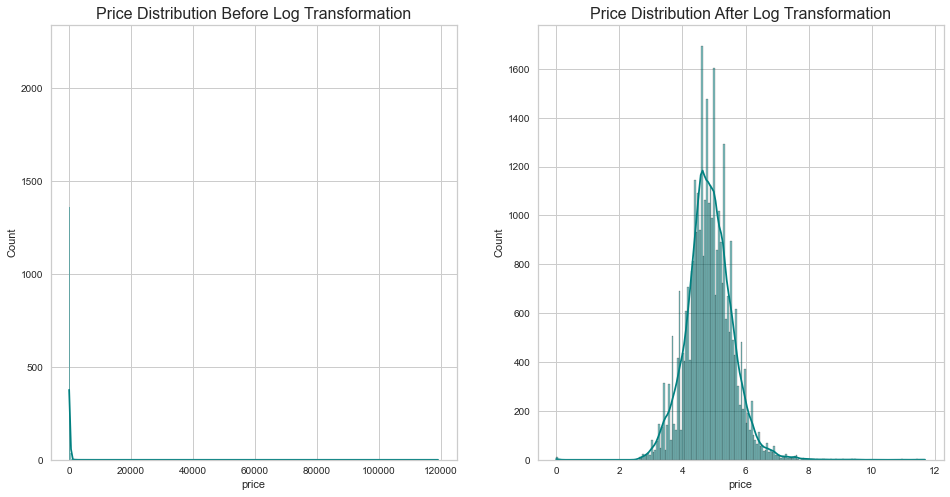

In [17]:
fig, ax = plt.subplots(1,2, figsize = (16,8))
sns.histplot(data=df, x="price", kde=True, ax=ax[0], color='teal').set_title("Price Distribution Before Log Transformation",
                                                                size = 16)
sns.histplot(np.log1p(df.price), kde=True, ax=ax[1], color='teal').set_title("Price Distribution After Log Transformation",
                                                                size = 16)

#### Check outliers

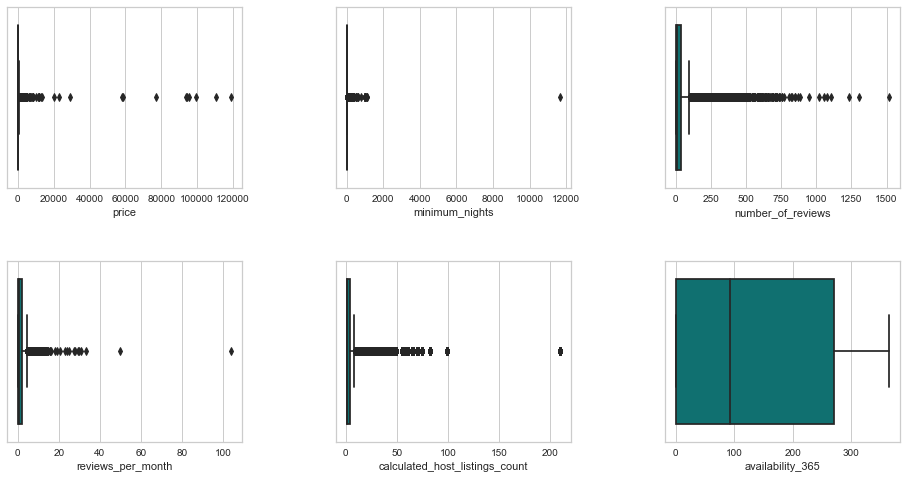

In [18]:
columns = ["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count",
          "availability_365"]
fig = plt.figure(figsize=(16,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for num, column_name in enumerate(columns):
    ax = fig.add_subplot(2, 3, num +1)
    ax = sns.boxplot(x=df[column_name], color='teal')

#### Remove outliers

In [19]:

q1_price = df["price"].quantile(0.25)
q3_price = df["price"].quantile(0.75)
iqr_price = q3_price - q1_price
lower_limit_price = q1_price - 1.5 * iqr_price
upper_limit_price = q3_price + 1.5 * iqr_price

df_filter_price = df[(df["price"] > lower_limit_price) & (df["price"] < upper_limit_price)]

df = df_filter_price
q1_price = df["price"].quantile(0.25)
q3_price = df["price"].quantile(0.75)
iqr_price = q3_price - q1_price
lower_limit_price = q1_price - 1.5 * iqr_price
upper_limit_price = q3_price + 1.5 * iqr_price

df_filter_price = df[(df["price"] > lower_limit_price) & (df["price"] < upper_limit_price)]

df = df_filter_price

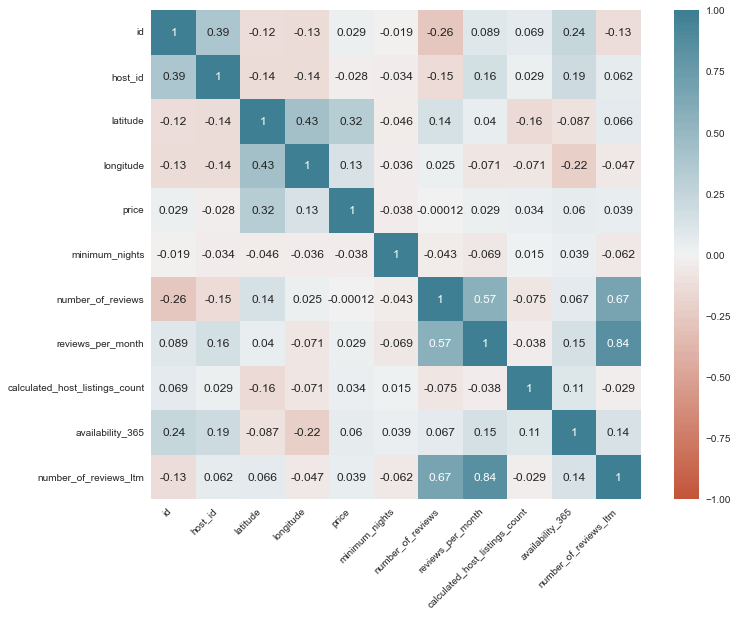

In [20]:
#  coorelation plotting

ax = plt.subplots(figsize=(12, 9))
corrMatrix = df.corr()
ax = sns.heatmap(
    corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [21]:
# plotting of distributions of different variables

def distribution_of_con(df,col):
    # Create a subplot
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
    
    # Title
    fig.suptitle(f"Distribution Of Continuous Variabel {col.capitalize()}",fontsize=20)
    
    # Plot histplot
    sns.histplot(df[col],ax=ax1, color='teal')
    
    # Plot box boxplot
    sns.boxplot(df[col],ax=ax2, color='teal')
    
    # Show
    plt.tight_layout(pad=2)
    plt.show()

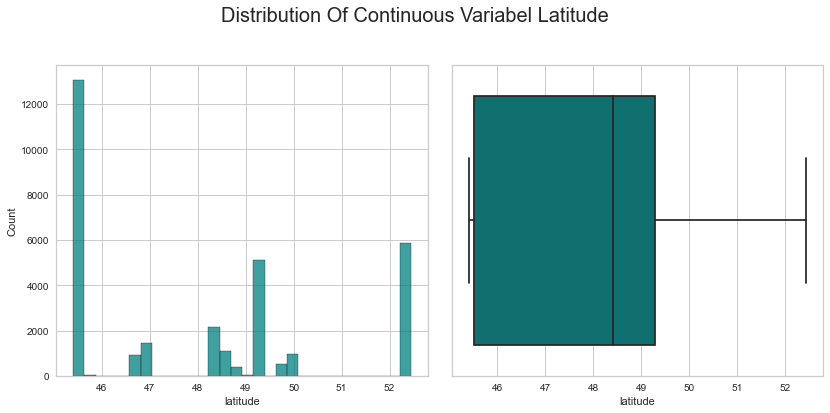

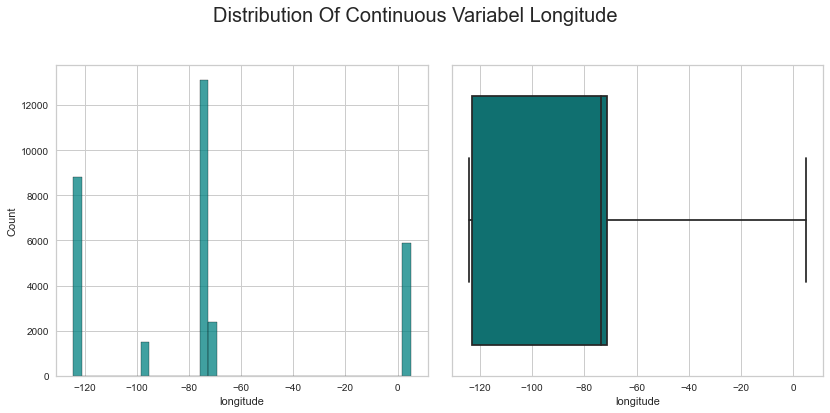

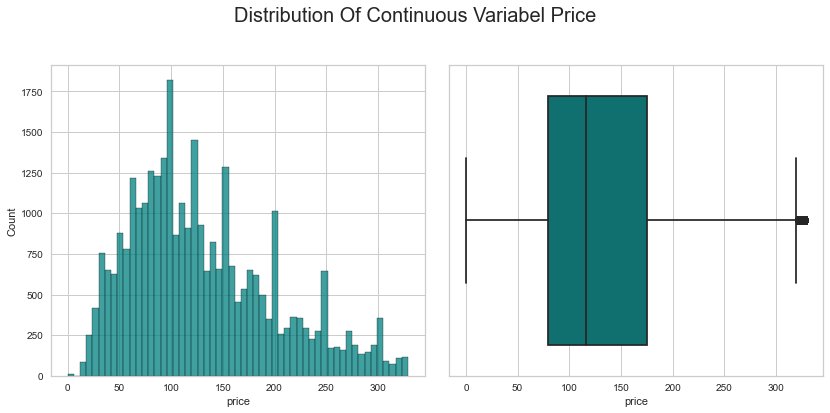

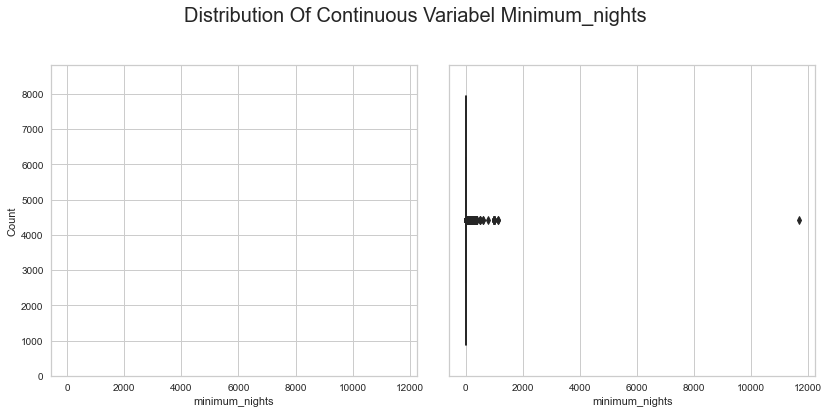

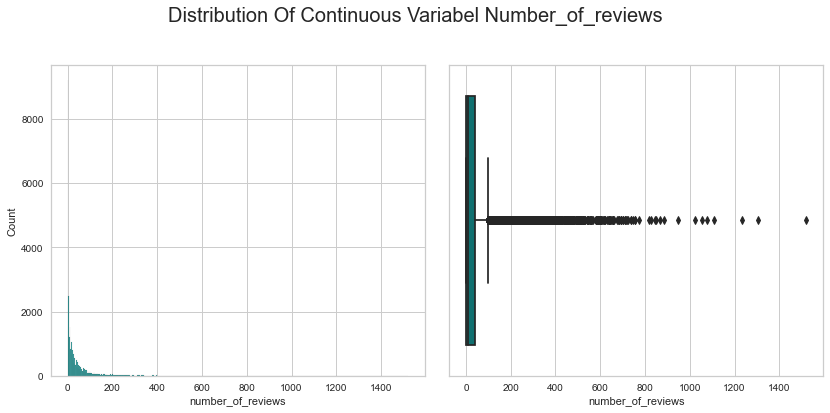

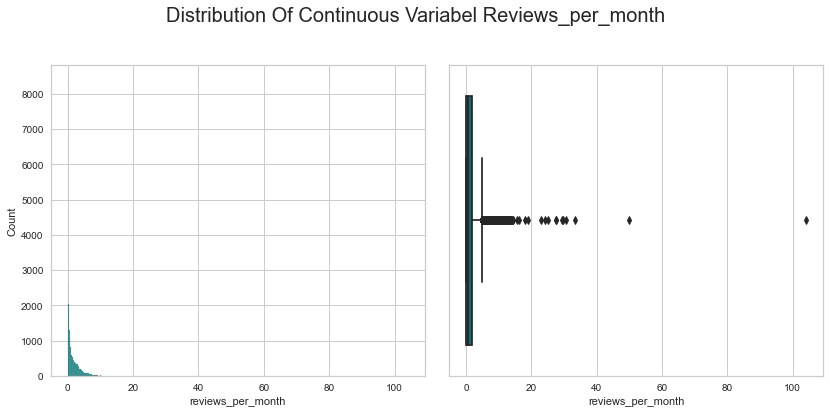

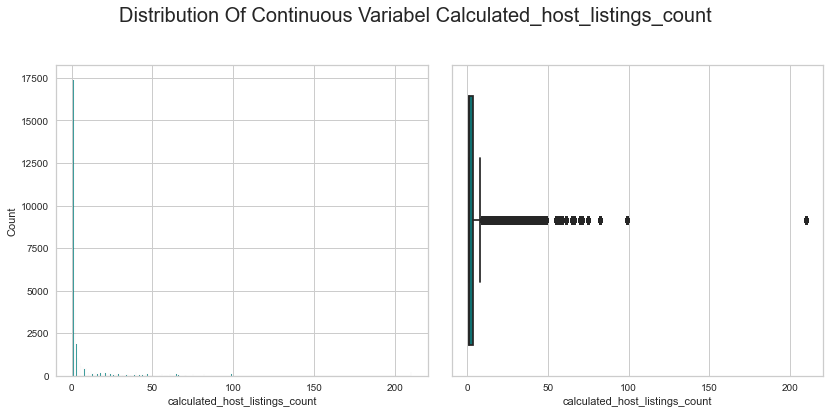

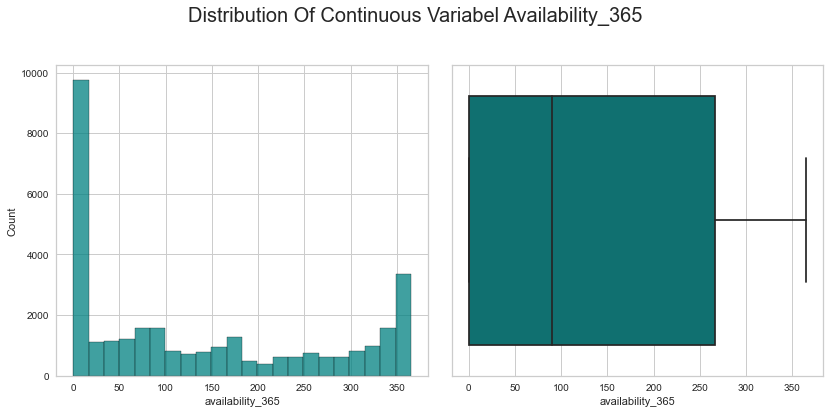

In [22]:
for col in ['latitude', 'longitude', 'price', 'minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']:
    distribution_of_con(df,col)

In [23]:
# drop the columns that will not affect the price prediction.
df.drop(["id", "name", "host_id", "host_name", "last_review"], axis = 1, inplace = True)

In [24]:
# Applying log transformation for the price column.
df["price"] = np.log1p(df["price"])
X = df.drop("price", axis = 1)
y = df["price"]

In [25]:
# Splitting Data as Train Data and Test Data

from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [26]:
# Applying one hot encoder on catagorical columns

ohe = OneHotEncoder(handle_unknown = 'ignore')
columns = ["neighbourhood", "room_type", "City", "City_type"]
ohe_df_train = pd.DataFrame(ohe.fit_transform(X_train[columns]).toarray(), columns=ohe.get_feature_names())
X_train_ohe = X_train.join(ohe_df_train).drop(columns, axis=1)

ohe_df_test = pd.DataFrame(ohe.transform(X_test[columns]).toarray(), columns=ohe.get_feature_names())
X_test_ohe = X_test.join(ohe_df_test).drop(columns, axis=1)

In [27]:
# Applying standard scaler to scale the values between -1 to 1

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_ohe)
X_test = scaler.transform(X_test_ohe)

In [28]:
# Perform differnt models on training data
# 1) ridge 2) lasso 3) DecisionTreeRegressor 4) RandomForestRegressor

def models(X_train, X_test, y_train, y_test):
    
    models = pd.DataFrame(columns=["Model","Test Sc.","Train Sc.","MAE","MSE","RMSE", "RMSE CV"])
        
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)

    test_score = r2_score(y_test, y_pred)
    train_score = ridge.score(X_train, y_train)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
   
    rmse_cv = np.sqrt(-cross_val_score(ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean())
    
    ridge_row = {"Model": "Ridge", "Test Sc.": test_score, "Train Sc.": train_score
               ,"MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE CV": rmse_cv}
    
    models = models.append(ridge_row, ignore_index=True)
    
    
    
    lasso = Lasso(alpha = 0.0001)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
   
    test_score = r2_score(y_test, y_pred)
    train_score = lasso.score(X_train, y_train)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
   
    rmse_cv = np.sqrt(-cross_val_score(lasso, X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean())
    
    lasso_row = {"Model": "Lasso", "Test Sc.": test_score, "Train Sc.": train_score
               ,"MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE CV": rmse_cv}
    
    models = models.append(lasso_row, ignore_index=True)
    
    
    dtr = DecisionTreeRegressor(min_samples_leaf=60)
    dtr.fit(X_train, y_train)
    y_pred= dtr.predict(X_test)
   
    test_score = r2_score(y_test, y_pred)
    train_score = dtr.score(X_train, y_train)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    rmse_cv = np.sqrt(-cross_val_score(dtr, X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean())
    
    dtr_row = {"Model": "DTR", "Test Sc.": test_score, "Train Sc.": train_score
               ,"MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE CV": rmse_cv}
    
    models = models.append(dtr_row, ignore_index=True)
    
    
    rfr = RandomForestRegressor(random_state = 42,
                                n_estimators = 100,
                                min_samples_split = 10,
                                min_samples_leaf = 1,
                                max_features = 'sqrt',
                                max_depth = 30,
                                bootstrap = True)
    rfr.fit(X_train, y_train)
    y_pred= rfr.predict(X_test)

    test_score = r2_score(y_test, y_pred)
    train_score = rfr.score(X_train, y_train)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    rmse_cv = np.sqrt(-cross_val_score(rfr, X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean())

    
    rfr_row = {"Model": "RFR", "Test Sc.": test_score, "Train Sc.": train_score
               ,"MAE": mae, "MSE": mse, "RMSE": rmse, "RMSE CV": rmse_cv}
    
    models = models.append(rfr_row, ignore_index=True)
    
    display(models.style.highlight_min(subset=["MAE","MSE","RMSE", "RMSE CV"], 
                                                color = 'springgreen', axis = 0).highlight_max(
        subset=["Test Sc.", "Train Sc."], color = 'springgreen', axis = 0))
    
    
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(16,6), dpi=300)
    plt.subplots_adjust(hspace=1.2)
    sns.lineplot(x=models["Model"], y=models["Test Sc."], ax=ax1, marker="o", color="teal")
    sns.lineplot(x=models["Model"], y=models["Train Sc."], ax=ax2, marker="o", color="teal")
    sns.lineplot(x=models["Model"], y=models["MAE"], ax=ax3, marker="o", color="teal")
    sns.lineplot(x=models["Model"], y=models["MSE"], ax=ax4, marker="o", color="teal")
    sns.lineplot(x=models["Model"], y=models["RMSE"], ax=ax5, marker="o", color="teal")
    sns.lineplot(x=models["Model"], y=models["RMSE CV"], ax=ax6, marker="o", color="teal")
    ax1.set_title("Test Scores Comparison", size=18)
    ax2.set_title("Train Scores Comparison", size=18)
    ax3.set_title("MAE Scores Comparison", size=18)
    ax4.set_title("MSE Scores Comparison", size=18)
    ax5.set_title("RMSE Scores Comparison", size=18)
    ax6.set_title("RMSE CV Scores Comparison", size=18)
    ax1.tick_params(labelrotation=30)
    ax2.tick_params(labelrotation=30)
    ax3.tick_params(labelrotation=30)
    ax4.tick_params(labelrotation=30)
    ax5.tick_params(labelrotation=30)
    ax6.tick_params(labelrotation=30)
    plt.show()

,Model,Test Sc.,Train Sc.,MAE,MSE,RMSE,RMSE CV
0,Ridge,0.339595,0.392320,0.374694,0.235820,0.485613,0.472811
1,Lasso,0.339642,0.392308,0.374724,0.235803,0.485595,0.472660
2,DTR,0.442185,0.535044,0.338806,0.199187,0.446303,0.431209
3,RFR,0.527679,0.758563,0.311523,0.168658,0.410680,0.397709


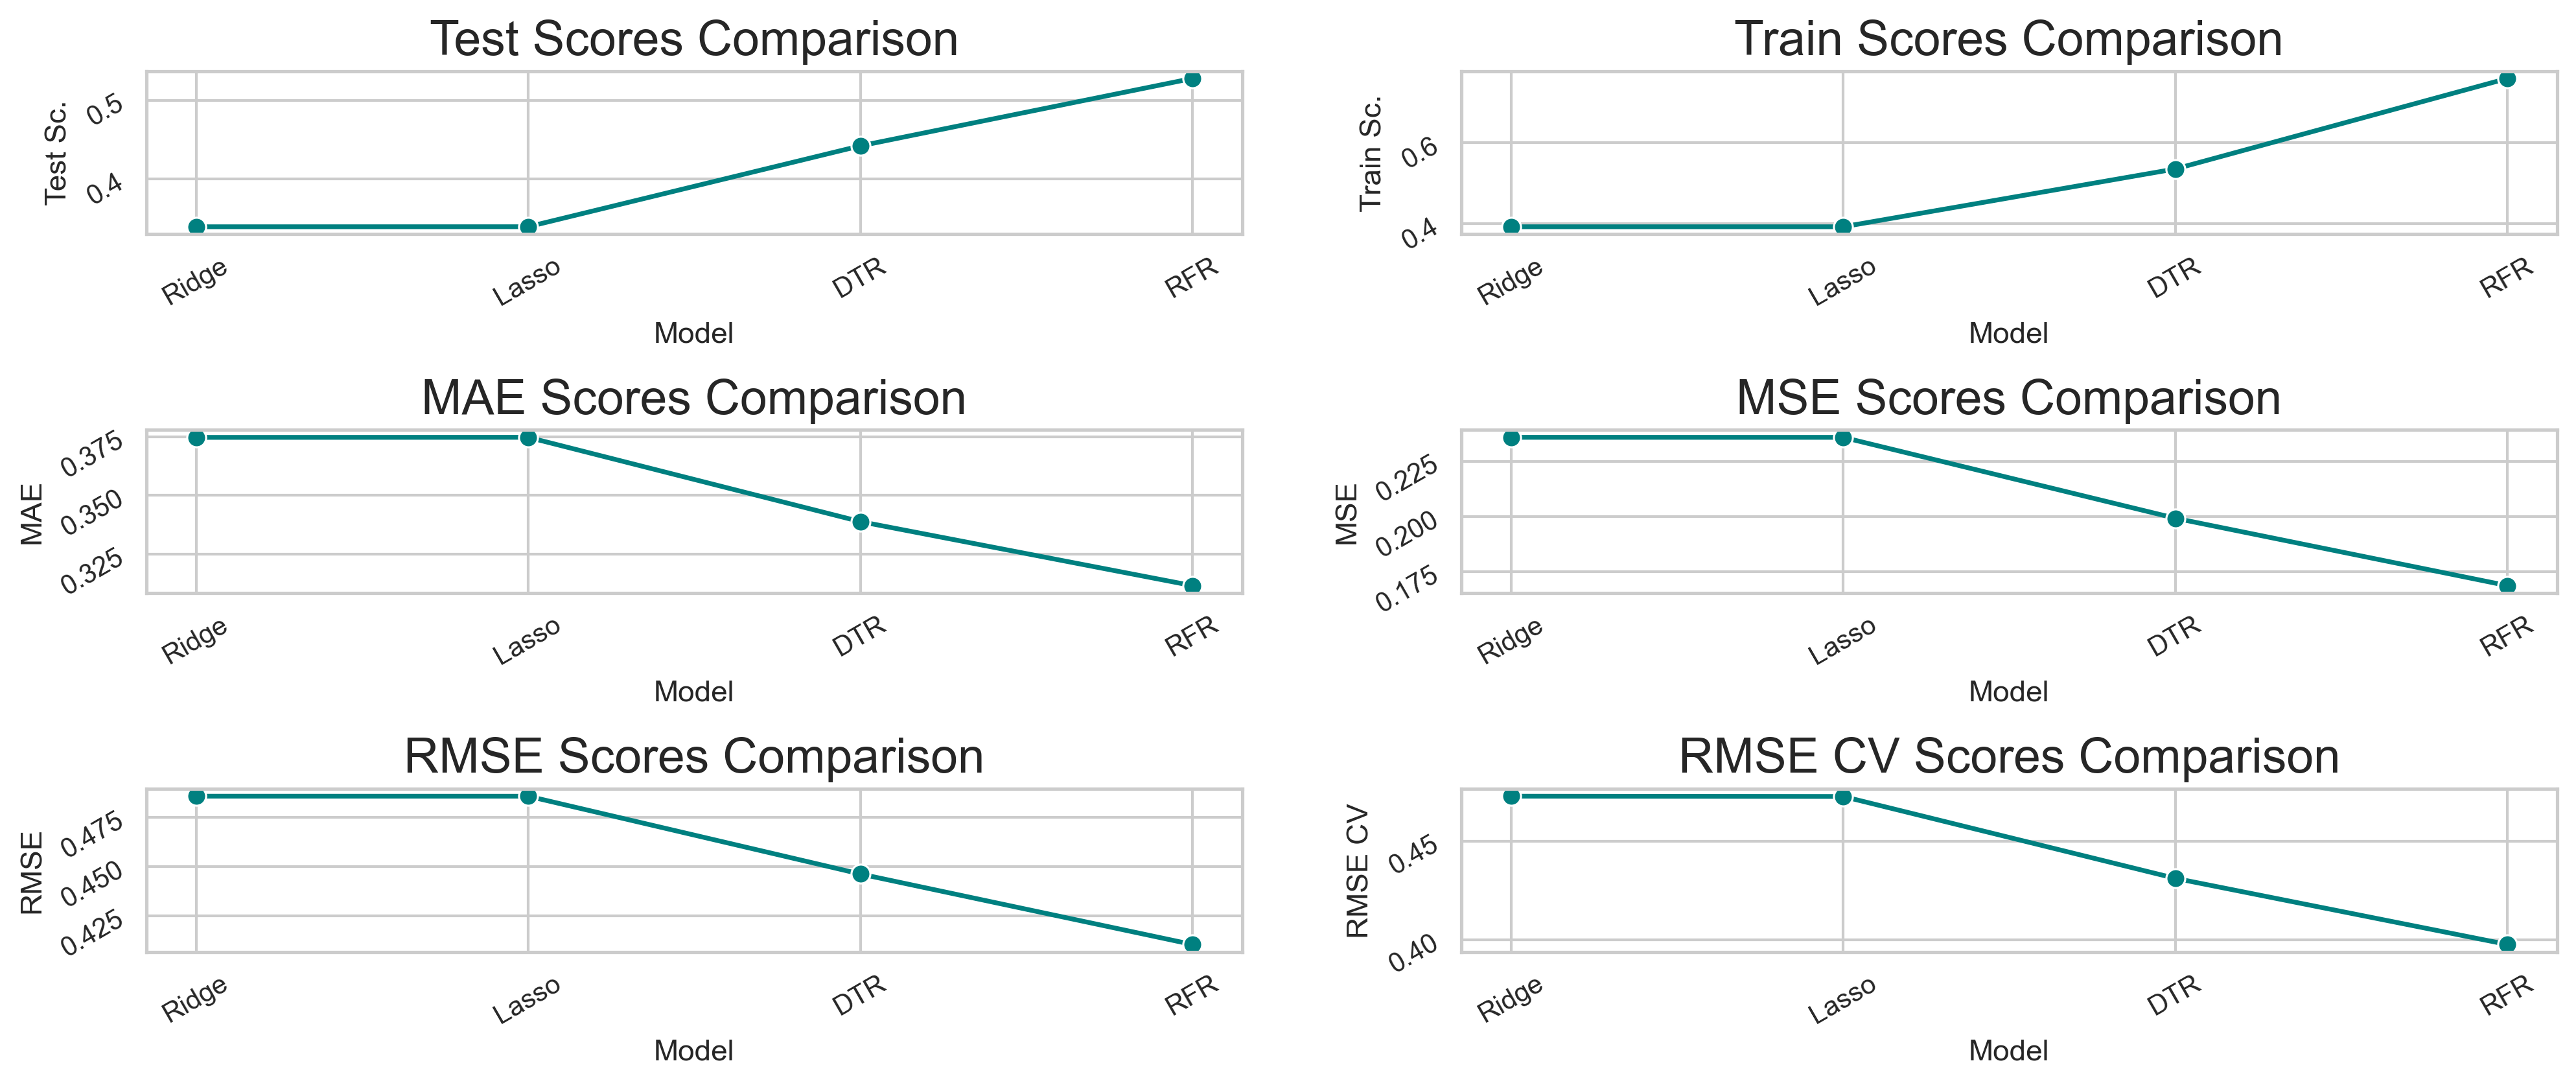

In [29]:
models(X_train, X_test, y_train, y_test)

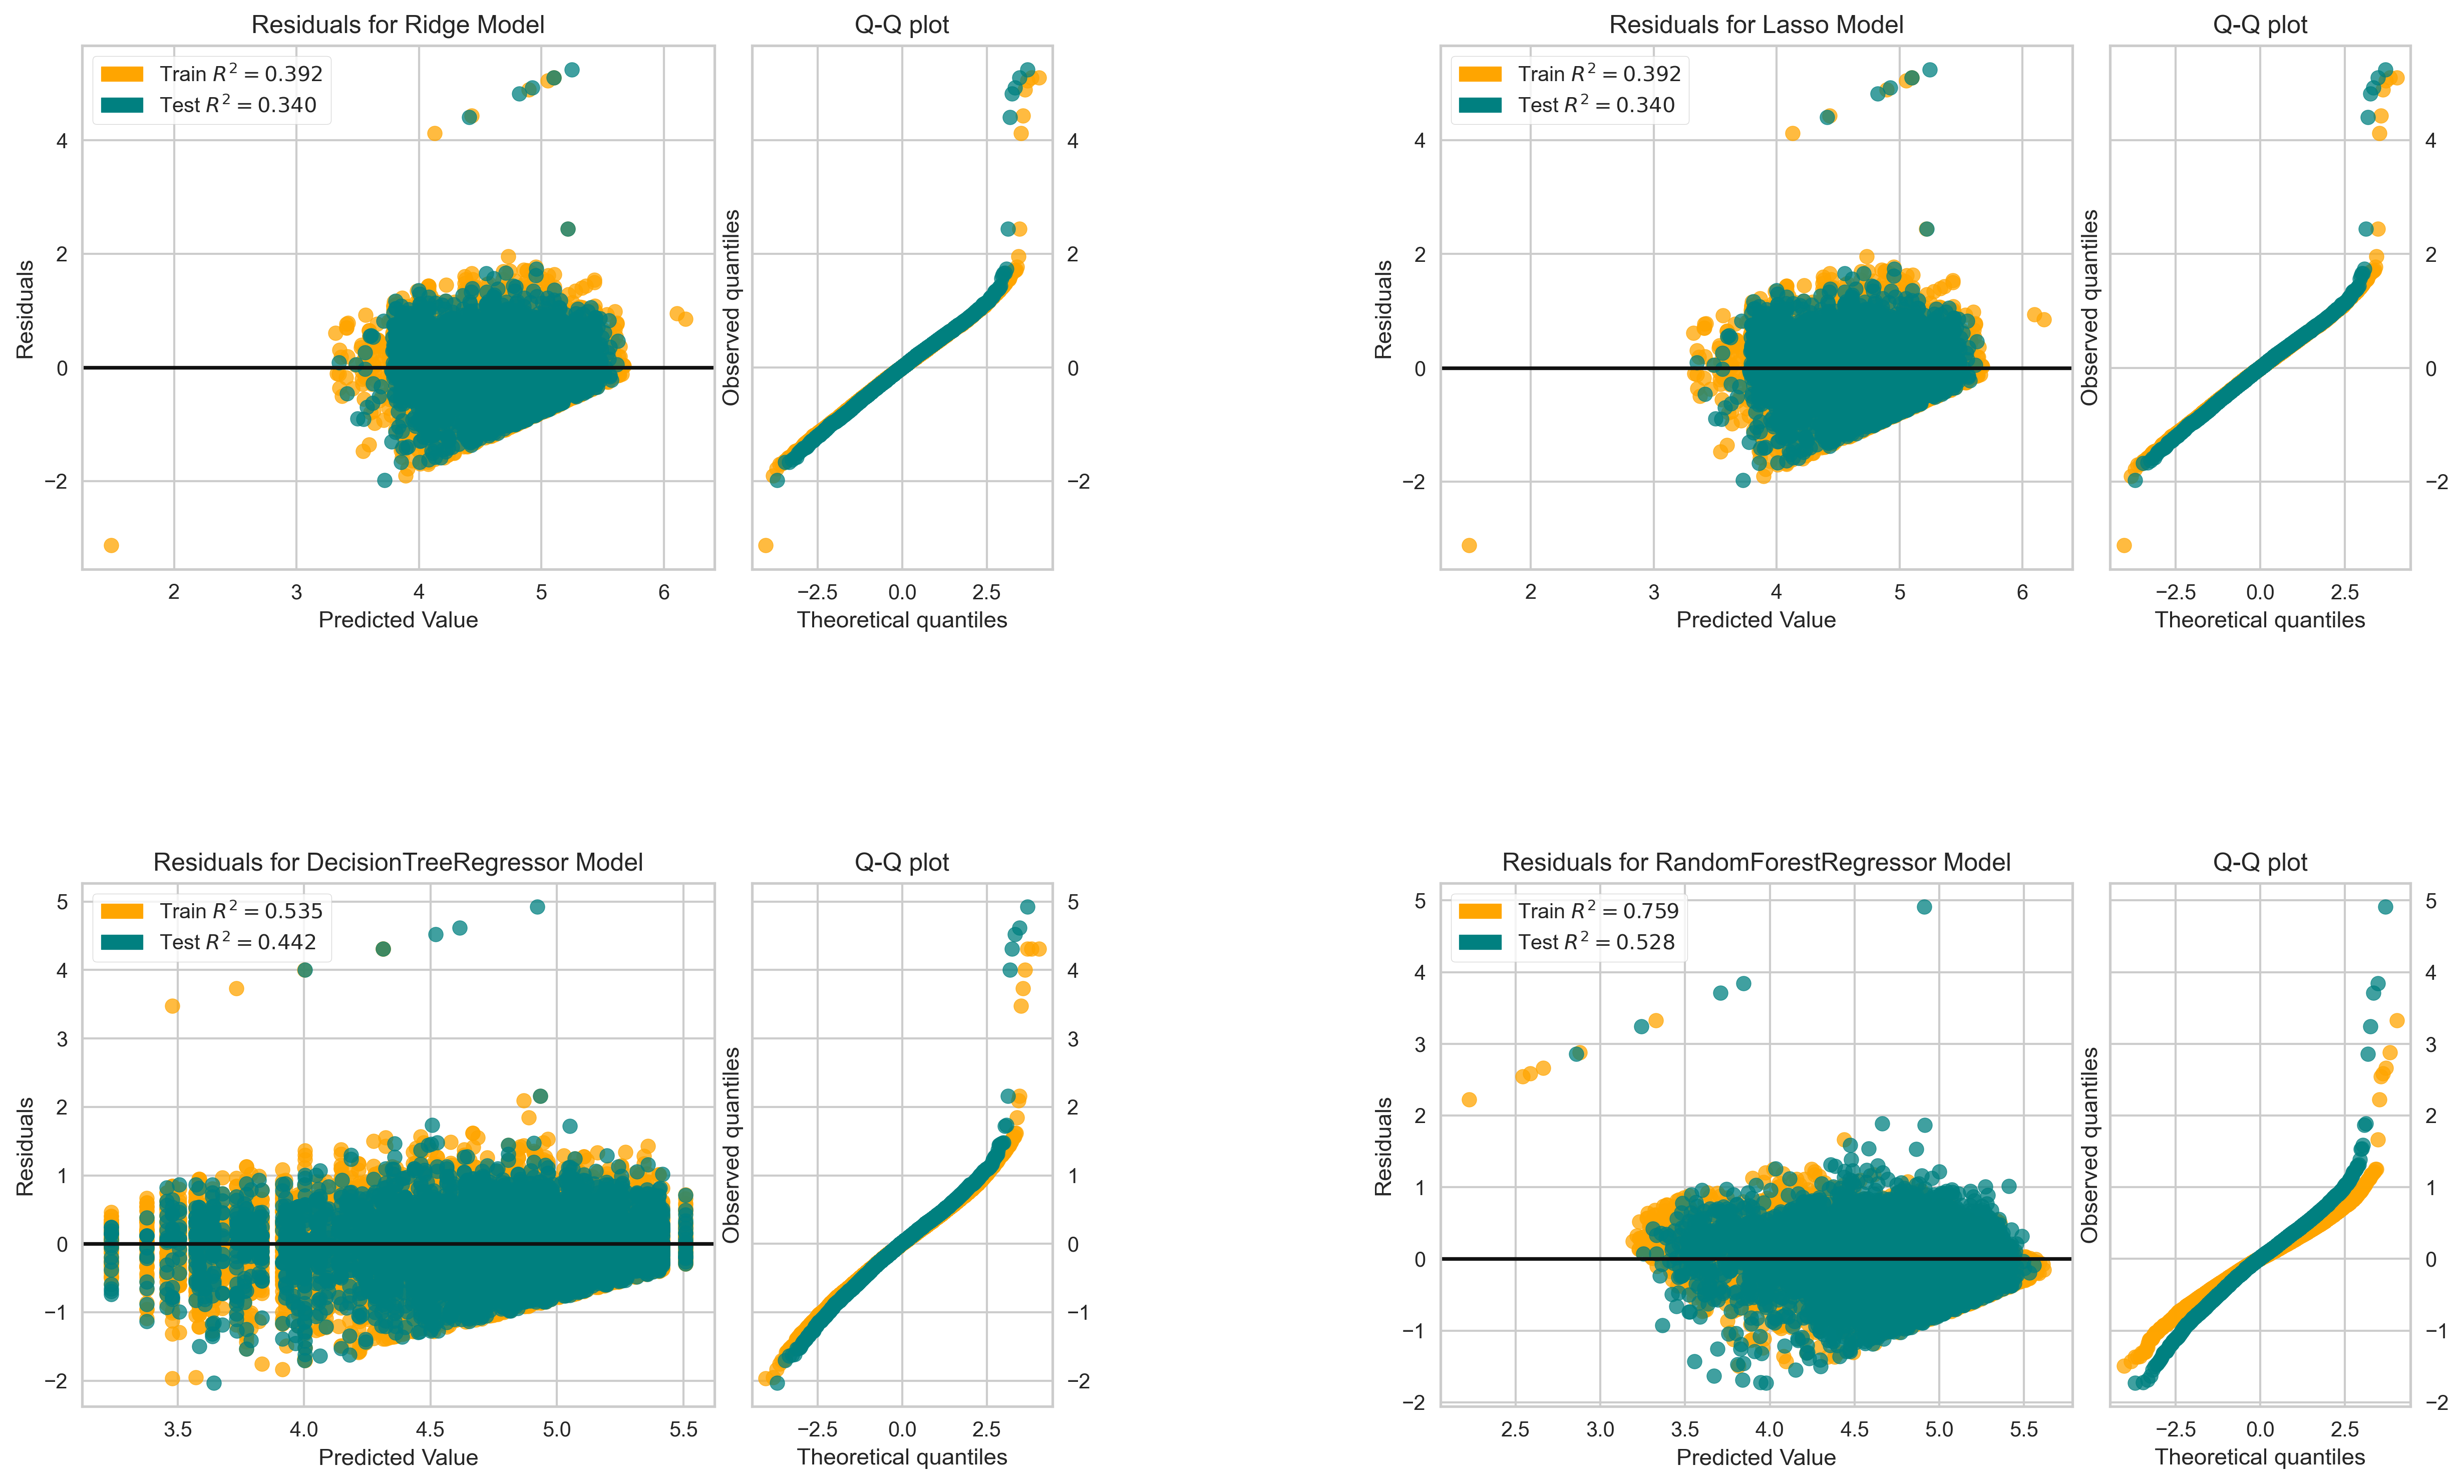

In [30]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,12), dpi=300)

fig.subplots_adjust(hspace=0.6, wspace=0.4)

ridge_visualizer = ResidualsPlot(Ridge(alpha=1.0), hist=False, qqplot=True, 
                                train_color="orange", test_color="teal", ax=ax1)



lasso_visualizer = ResidualsPlot(Lasso(alpha = 0.0001), hist=False, qqplot=True, 
                                train_color="orange", test_color="teal", ax=ax2)


dtr_visualizer = ResidualsPlot(DecisionTreeRegressor(min_samples_leaf=60), hist=False, qqplot=True, 
                                train_color="orange", test_color="teal", ax=ax3)

rfr_visualizer = ResidualsPlot(RandomForestRegressor(random_state = 42,
                                n_estimators = 100,
                                min_samples_split = 10,
                                min_samples_leaf = 1,
                                max_features = 'sqrt',
                                max_depth = 30,
                                bootstrap = True), hist=False, qqplot=True, 
                                train_color="orange", test_color="teal", ax=ax4)


ridge_visualizer.fit(X_train, y_train)
lasso_visualizer.fit(X_train, y_train)
dtr_visualizer.fit(X_train, y_train)
rfr_visualizer.fit(X_train, y_train)

ridge_visualizer.score(X_test, y_test)
lasso_visualizer.score(X_test, y_test)
dtr_visualizer.score(X_test, y_test)
rfr_visualizer.score(X_test, y_test)

ridge_visualizer.finalize()
lasso_visualizer.finalize()
dtr_visualizer.finalize()
rfr_visualizer.finalize()

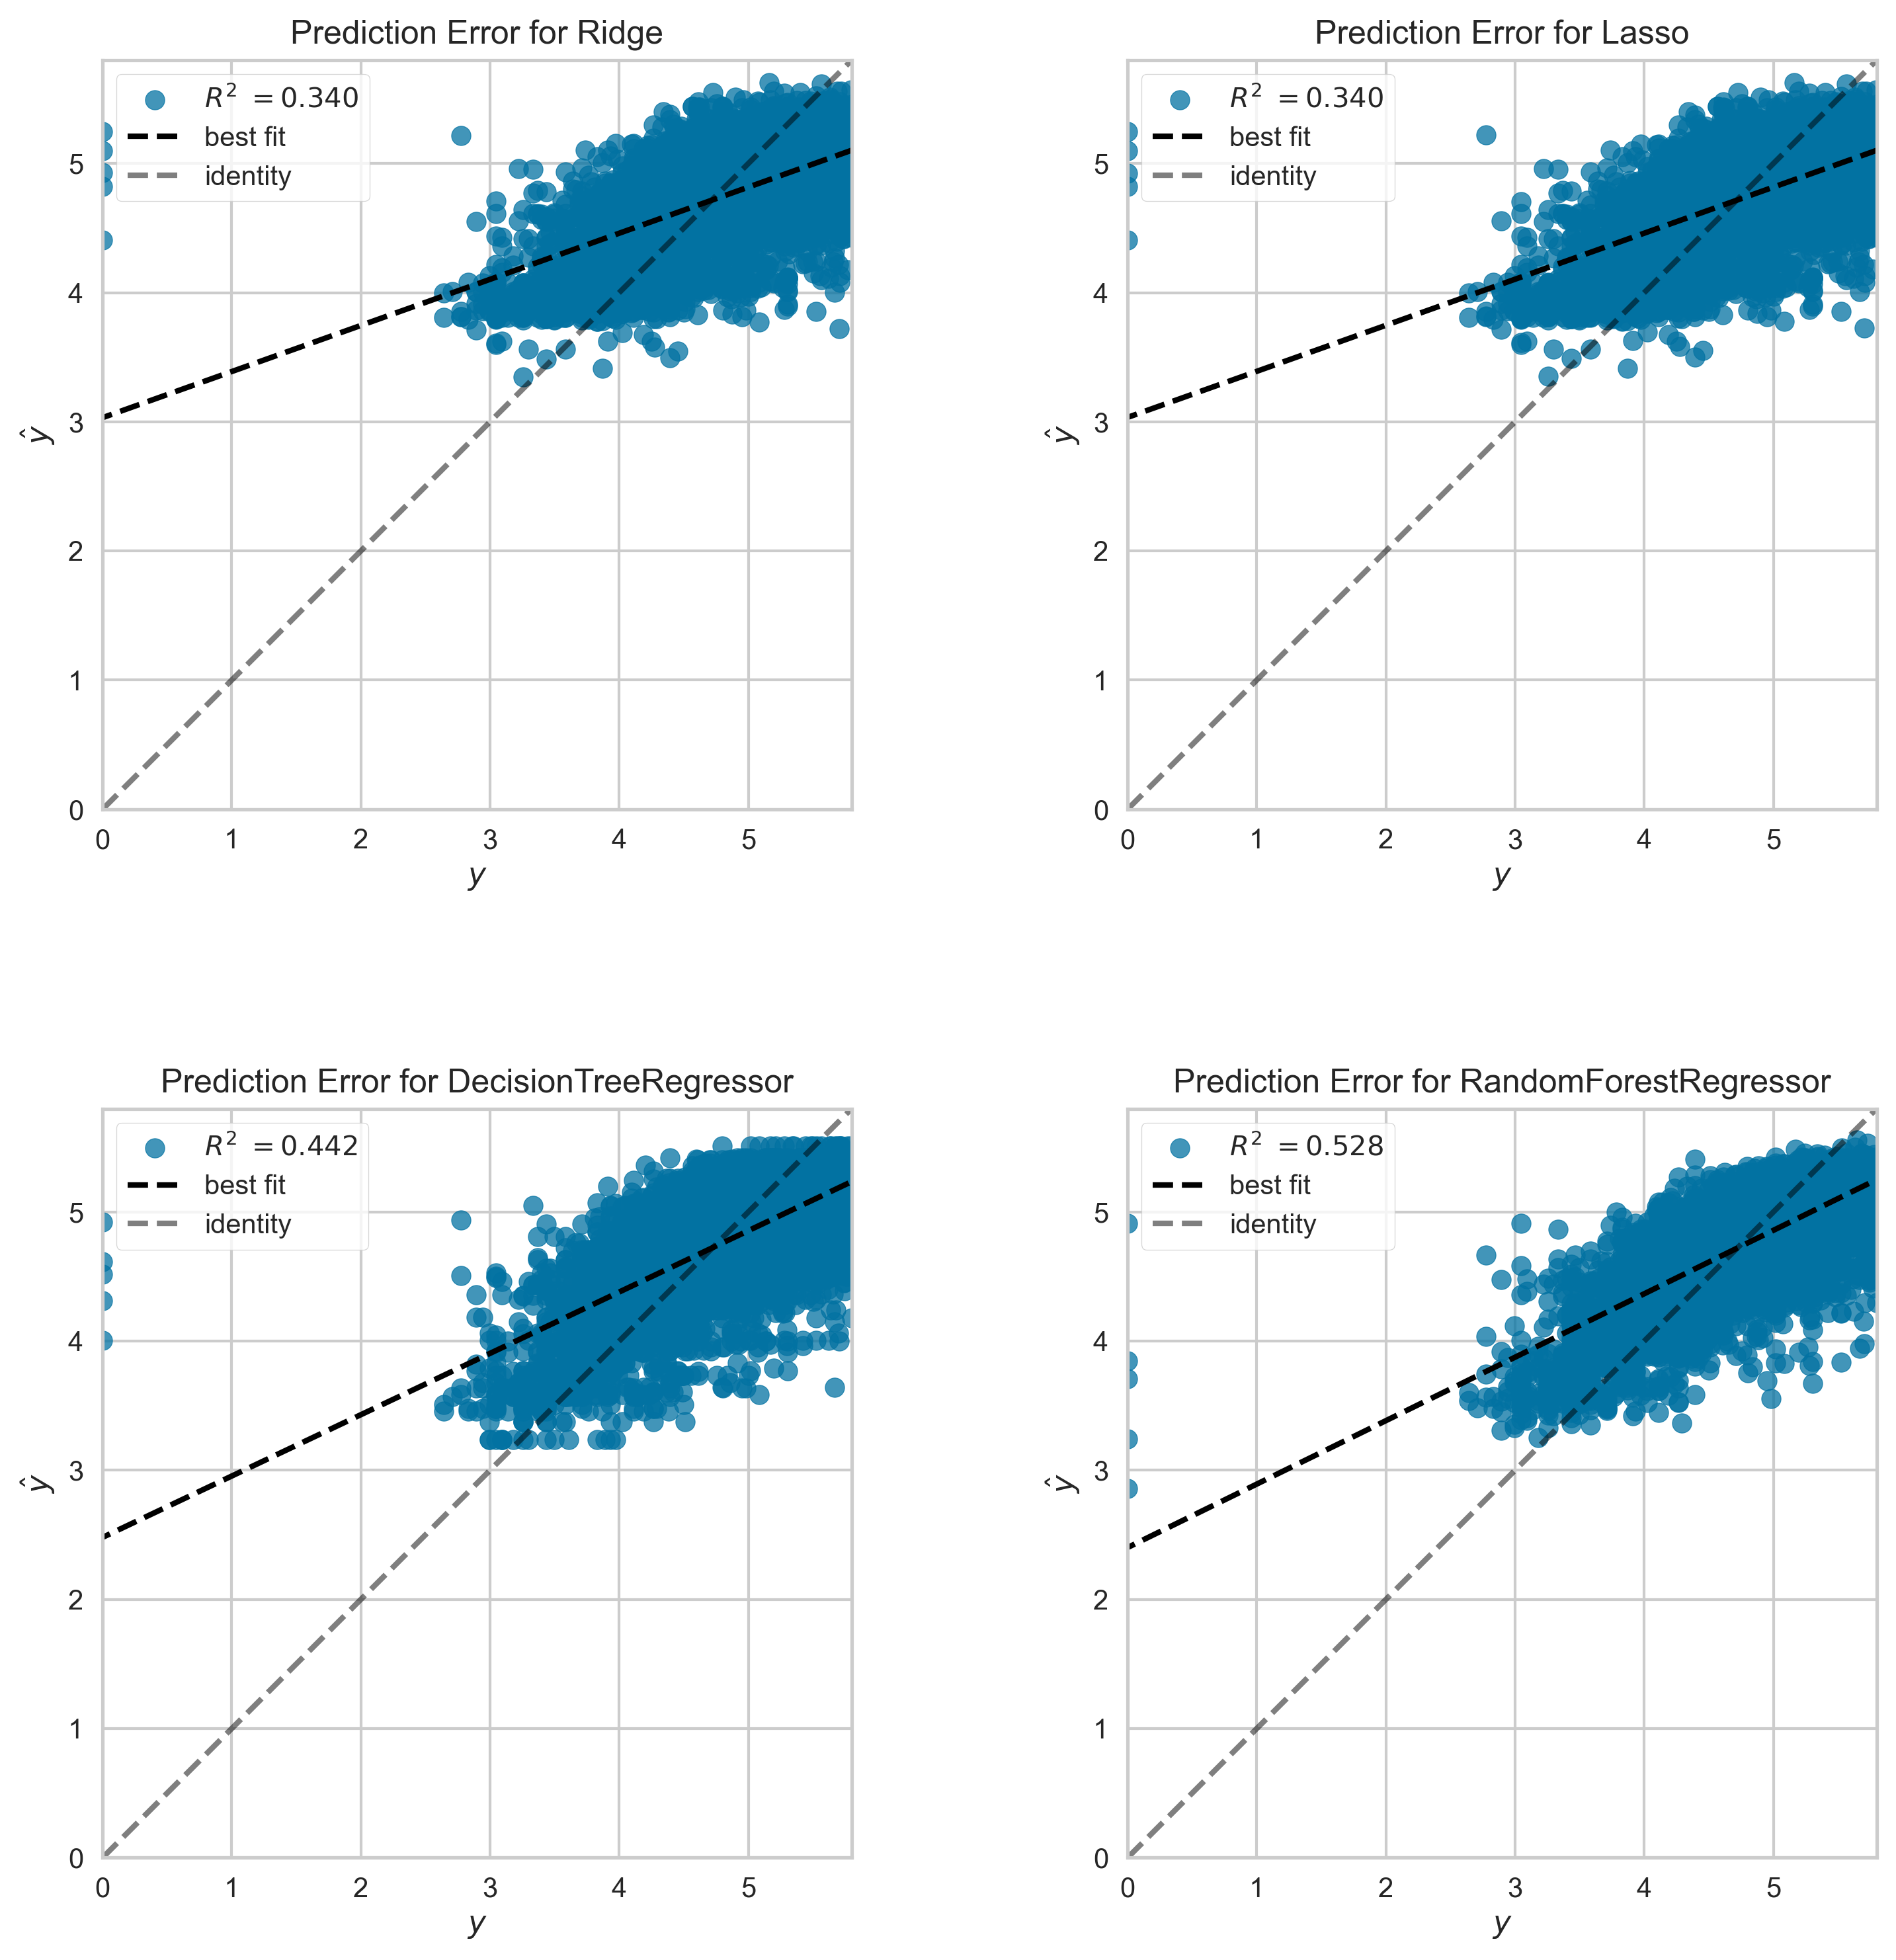

In [31]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,12), dpi=300)

fig.subplots_adjust(hspace=0.4, wspace=-0.5)

model_ridge = Ridge(alpha=1.0)

model_lasso = Lasso(alpha = 0.0001)

model_dtr = DecisionTreeRegressor(min_samples_leaf=60)

model_rfr = RandomForestRegressor(random_state = 42,
                                n_estimators = 100,
                                min_samples_split = 10,
                                min_samples_leaf = 1,
                                max_features = 'sqrt',
                                max_depth = 30,
                                bootstrap = True)

ridge_prediction_error = PredictionError(model_ridge, line_color="black", ax=ax1)
lasso_prediction_error = PredictionError(model_lasso, line_color="black", ax=ax2)
dtr_prediction_error = PredictionError(model_dtr, line_color="black", ax=ax3)
rfr_prediction_error = PredictionError(model_rfr, line_color="black", ax=ax4)

ridge_prediction_error.fit(X_train, y_train)
lasso_prediction_error.fit(X_train, y_train)
dtr_prediction_error.fit(X_train, y_train)
rfr_prediction_error.fit(X_train, y_train)

ridge_prediction_error.score(X_test, y_test) 
lasso_prediction_error.score(X_test, y_test) 
dtr_prediction_error.score(X_test, y_test) 
rfr_prediction_error.score(X_test, y_test)

ridge_prediction_error.finalize()  
lasso_prediction_error.finalize()  
dtr_prediction_error.finalize()  
rfr_prediction_error.finalize()  